In [1]:
import os
import sys
import time
import numpy as np

from utils.generate_synthetic import simulation, show_synthetic_result
from src.data_class import matrix_class
from src.ICQF import ICQF

### Quick example

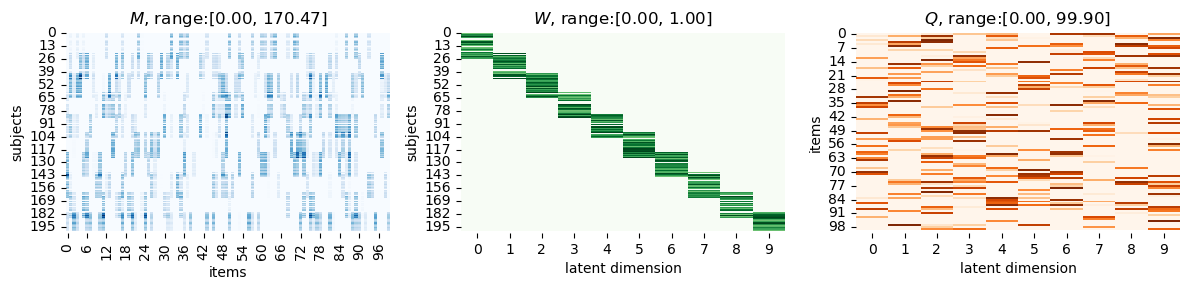

In [44]:
true_W, true_Q, _, M_clean, M, _ = simulation(200, 100)

In [45]:
MF_data = matrix_class(M=M)

No M_raw[matrix] provided
Make a copy of M[matrix] as M_raw[matrix]
M[matrix] is not normalized, contains entries > 1
Column-wise maximum of M are ranging 0.000 --  170.473


In [4]:
clf = ICQF(n_components=10,
           W_upperbd=(True, 1.0),
           M_upperbd=(True, np.max(MF_data.M)),
           Q_upperbd=(True, 100))

In [5]:
tic = time.perf_counter()
MF_data, loss = clf.fit_transform(MF_data)
toc = time.perf_counter()
print(f"factorization time: {toc-tic:0.4f}s")

factorization time: 0.1450s


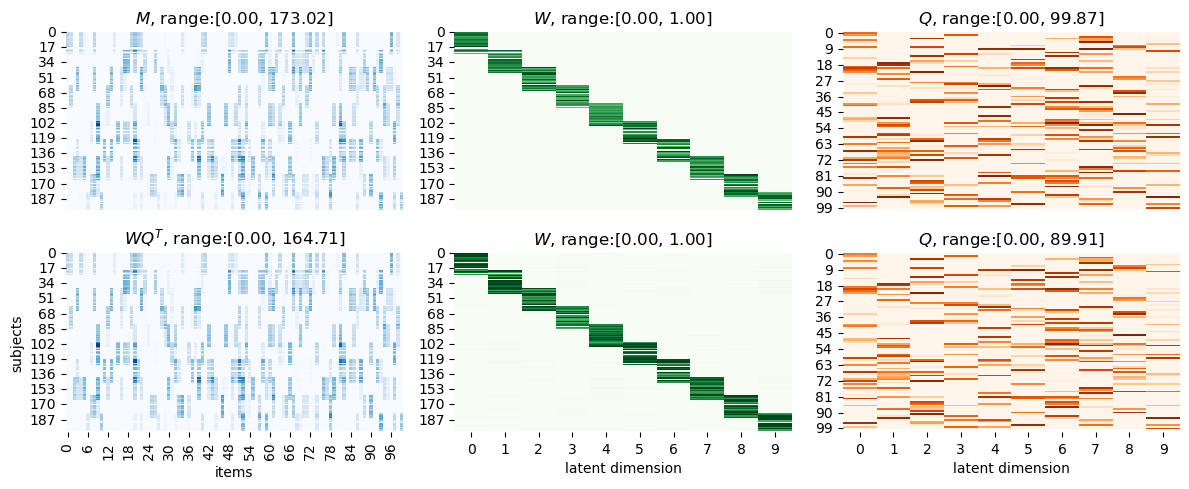

In [6]:
show_synthetic_result(MF_data, true_W, true_Q)

### If you have no idea on the latent dimension ...

In [49]:
clf = ICQF(W_upperbd=(True, 1.0),
           M_upperbd=(True, np.max(MF_data.M)),
           Q_upperbd=(True, 100))

/home/lamk5/miniconda3/envs/ICQF/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/lamk5/miniconda3/envs/ICQF/lib/python3.8/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


shared beta search space :  [0.001, 0.01, 0.1, 0.2, 0.5]
dimension detection range: 5 - 15


repeat-[ 5]: optimal config-[10,0.001,0.001]: 100%|██████████| 5/5 [00:41<00:00,  8.33s/it]     


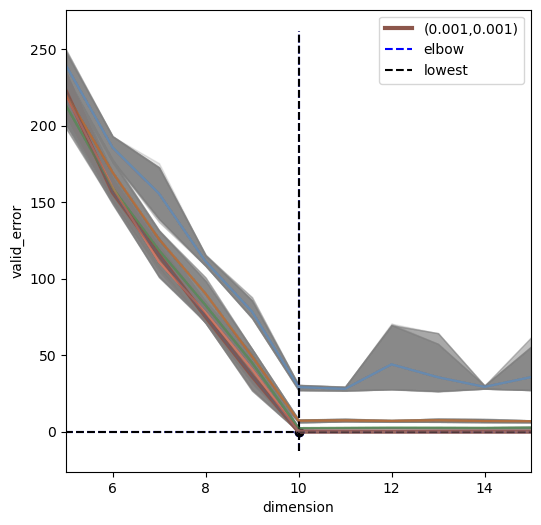

In [50]:
MF_data, loss = clf.fit_transform(MF_data)

### Synthetic example with confounds

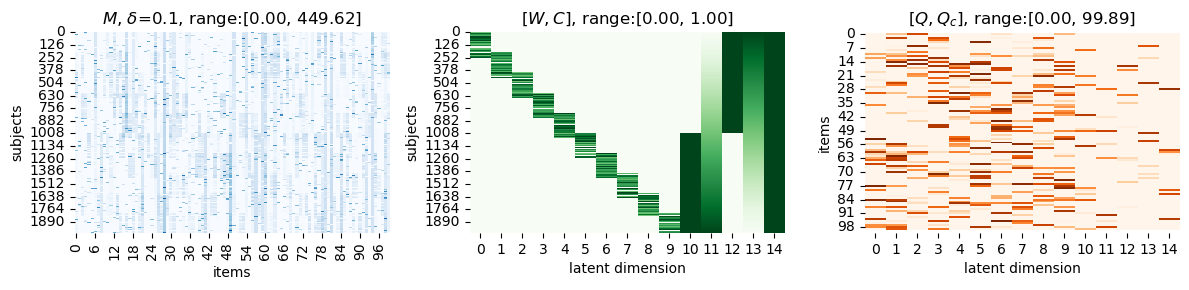

In [2]:
true_W, true_Q, confound_raw, M_clean, M, _ = simulation(2000, 100, noise=True, confound=True, visualize=True)

In [3]:
print(np.around(confound_raw,3))

[[0.    0.   ]
 [0.    0.001]
 [0.    0.001]
 ...
 [1.    0.999]
 [1.    0.999]
 [1.    1.   ]]


In [4]:
MF_data = matrix_class(M=M, confound_raw=confound_raw)

No M_raw[matrix] provided
Make a copy of M[matrix] as M_raw[matrix]
Make a copy of confound_raw[matrix] as confound[matrix]
M[matrix] is not normalized, contains entries > 1
Column-wise maximum of M are ranging 100.195 --  449.620


In [5]:
clf = ICQF(n_components=10,
           W_beta=0.01,
           Q_beta=0.01,
           W_upperbd=(True, 1.0),
           M_upperbd=(True, np.max(MF_data.M)),
           Q_upperbd=(True, 100),
           method='cd', max_iter=2000, min_iter=10, tol=1e-6, verbose=True)

In [6]:
MF_data, loss = clf.fit_transform(MF_data)

loss=1.052e+08, tol=9.923e-07, time/iter=0.01s (-0.00s,-0.00s,-0.00):  14%|█▍        | 283/2000 [00:03<00:18, 93.62it/s]

Algorithm converged with relative error < 1e-06.


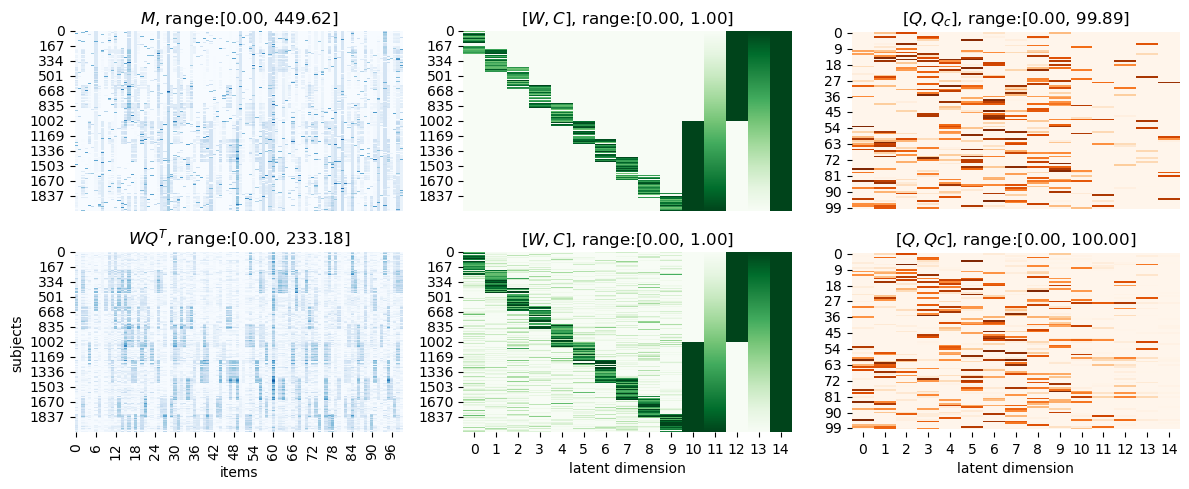

In [7]:
show_synthetic_result(MF_data, true_W, true_Q)

### Synthetic example with missing entries

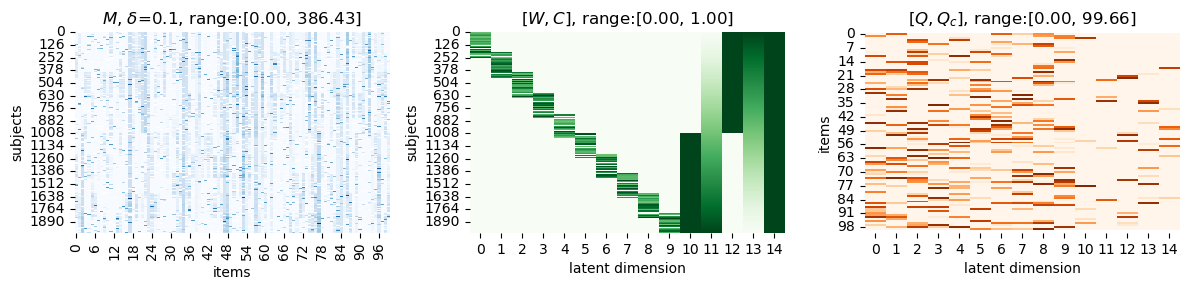

In [14]:
true_W, true_Q, confound_raw, M_clean, M, nan_mask = simulation(2000, 100, noise=True, confound=True, missing_ratio=0.05)

In [15]:
MF_data = matrix_class(M=M, confound_raw=confound_raw, nan_mask=nan_mask)

No M_raw[matrix] provided
Make a copy of M[matrix] as M_raw[matrix]
Make a copy of confound_raw[matrix] as confound[matrix]
[[[Warning]]] Input M[matrix] contains 9929 NaN elements
Map NaN entries to zero in M[matrix]
M[matrix] is not normalized, contains entries > 1
Column-wise maximum of M are ranging 93.176 --  386.429


In [16]:
clf = ICQF(n_components=10,
           W_beta=0.01,
           Q_beta=0.01,
           W_upperbd=(True, 1.0),
           M_upperbd=(True, np.max(MF_data.M)),
           Q_upperbd=(True, 100),
           method='cd', max_iter=2000, min_iter=10, tol=1e-6, verbose=True)

In [17]:
MF_data, loss = clf.fit_transform(MF_data)

loss=8.438e+07, tol=9.354e-07, time/iter=0.01s (-0.00s,-0.00s,-0.00):  16%|█▋        | 327/2000 [00:03<00:16, 99.13it/s] 

Algorithm converged with relative error < 1e-06.


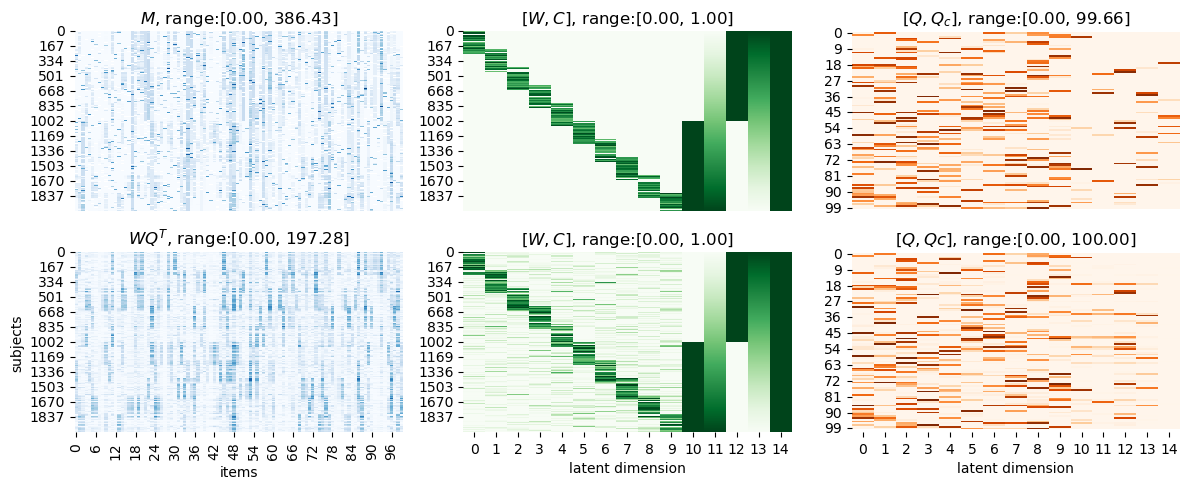

In [18]:
show_synthetic_result(MF_data, true_W, true_Q)

### Detect configuration

#### Example 1

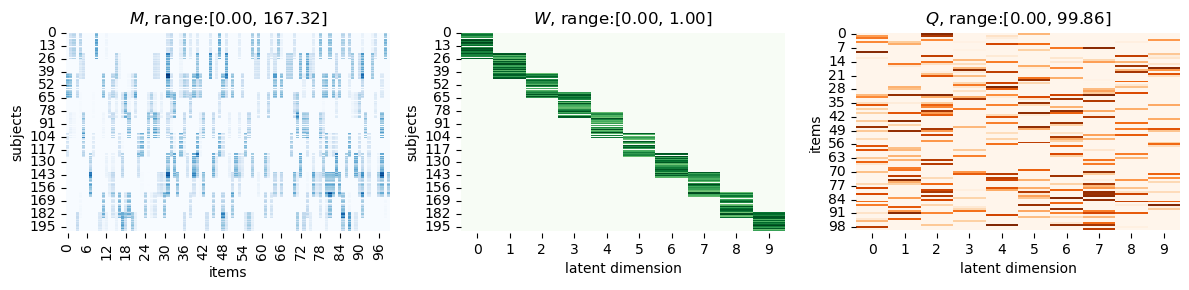

In [19]:
true_W, true_Q, _, M_clean, M, _ = simulation(200, 100)

In [20]:
MF_data = matrix_class(M=M)

No M_raw[matrix] provided
Make a copy of M[matrix] as M_raw[matrix]
M[matrix] is not normalized, contains entries > 1
Column-wise maximum of M are ranging 0.000 --  167.320


/home/lamk5/miniconda3/envs/ICQF/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/lamk5/miniconda3/envs/ICQF/lib/python3.8/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


shared beta search space :  [0.001, 0.01, 0.1, 0.2, 0.5]
dimension detection range: 5 - 15


repeat-[ 5]: optimal config-[10,0.001,0.001]: 100%|██████████| 5/5 [01:07<00:00, 13.51s/it]     


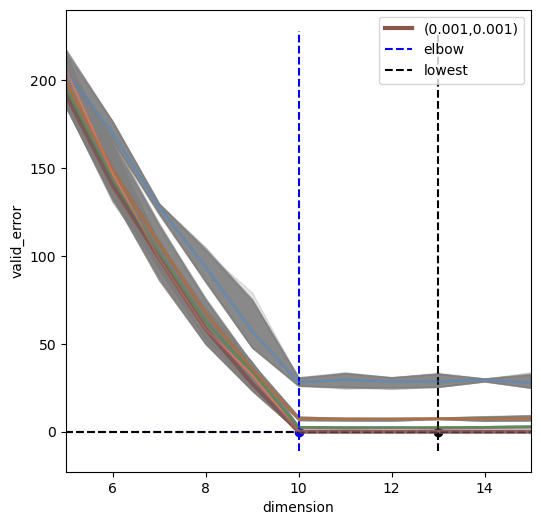

In [22]:
optimal_MF_data, optimal_stat, embed_stat_list = clf.detect_dimension(MF_data)

shared beta search space :  [0.0, 0.01, 0.1]
dimension detection range: 7 - 13


repeat-[ 2]: optimal config-[10,0.000,0.000]: 100%|██████████| 2/2 [03:38<00:00, 109.25s/it]      


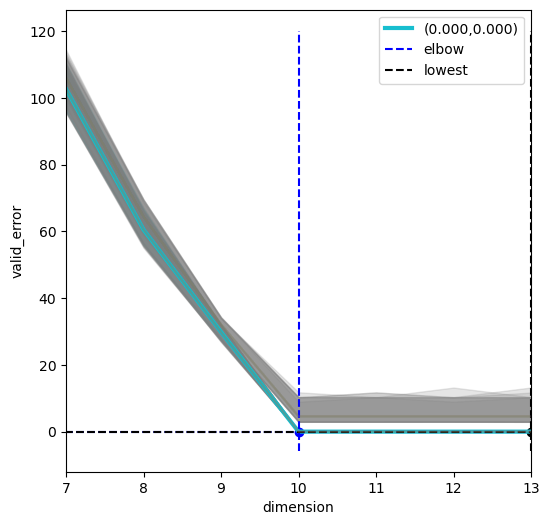

In [23]:
optimal_MF_data, optimal_stat, embed_stat_list = clf.detect_dimension(MF_data,
                                                                      dimension_list=[7,8,9,10,11,12,13],
                                                                      W_beta_list=[0.0, 0.01, 0.1],
                                                                      repeat=2, nfold=10,
                                                                      random_fold=False,
                                                                      separate_beta=False)

#### Example 2

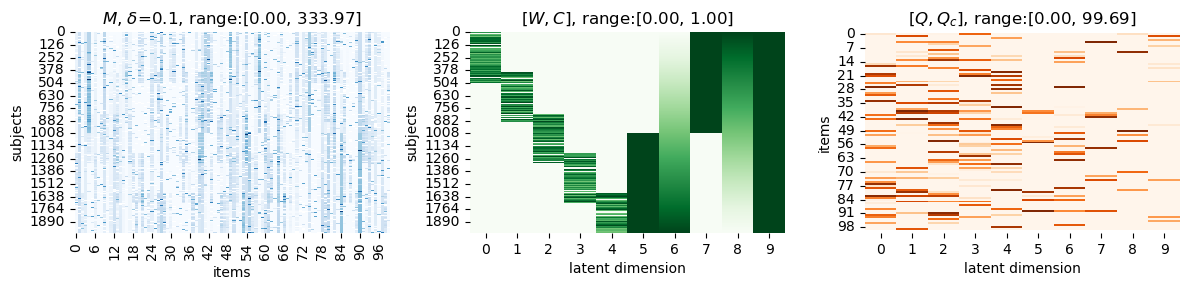

In [33]:
true_W, true_Q, confound_raw, M_clean, M, nan_mask = simulation(2000, 100,
                                                                ndict=5, overlap=100, 
                                                                noise=True,
                                                                confound=True,
                                                                missing_ratio=0.05,
                                                                visualize=True)

In [34]:
MF_data = matrix_class(M=M, nan_mask=nan_mask, confound_raw=confound_raw)

No M_raw[matrix] provided
Make a copy of M[matrix] as M_raw[matrix]
Make a copy of confound_raw[matrix] as confound[matrix]
[[[Warning]]] Input M[matrix] contains 9944 NaN elements
Map NaN entries to zero in M[matrix]
M[matrix] is not normalized, contains entries > 1
Column-wise maximum of M are ranging 101.310 --  333.969


In [36]:
clf = ICQF(n_components=None,
           W_upperbd=(True, 1.0),
           M_upperbd=(True, np.max(MF_data.M)),
           Q_upperbd=(True, 100.0))

shared beta search space :  [0.001, 0.01, 0.1, 0.2, 0.5]
dimension detection range: 2 - 11


repeat-[10]: optimal config-[ 5,0.010,0.010]: 100%|██████████| 10/10 [11:52<00:00, 71.25s/it]    


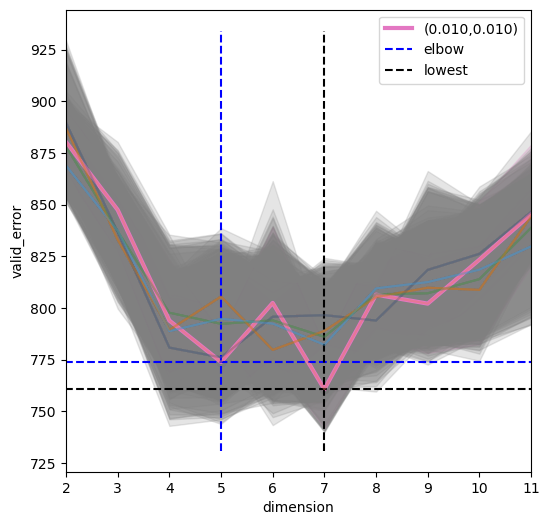

In [37]:
MF_data, loss = clf.fit_transform(MF_data)

In [38]:
clf.n_components

5

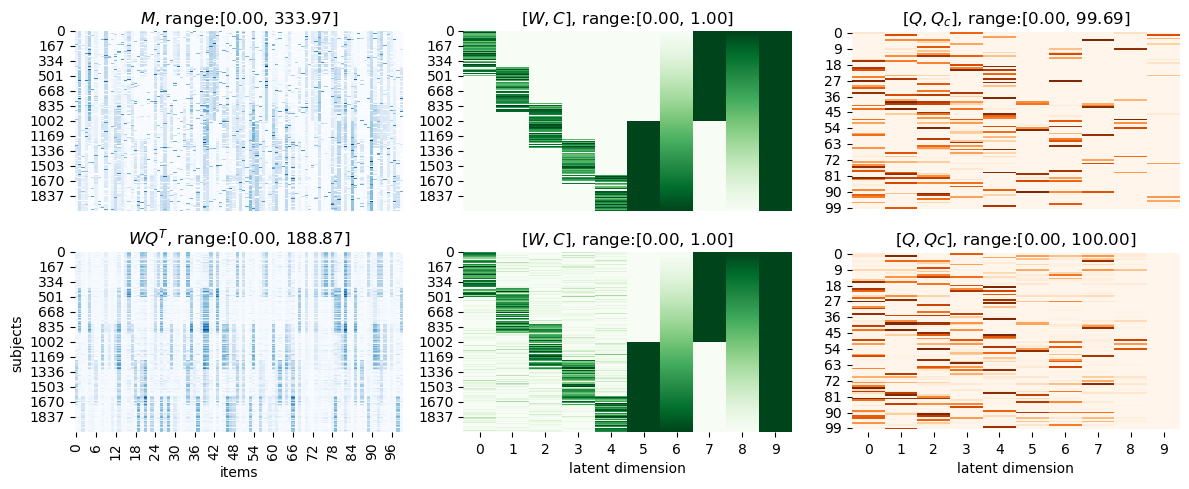

In [40]:
show_synthetic_result(optimal_MF_data, true_W, true_Q)